In [1]:
import matplotlib
import numpy

%matplotlib inline
matplotlib.style.use('ggplot')

In [3]:
def draw_kern_frenkel_particle(
    ax, xy, sigma, kf_lambda, kf_delta, kf_director, draw_arrow=False
):
    theta_director = numpy.rad2deg(numpy.arctan2(kf_director[1], kf_director[0]))
    wedge = matplotlib.patches.Wedge(
        xy,
        sigma * kf_lambda,
        theta_director - kf_delta,
        theta_director + kf_delta,
        alpha=0.5,
        zorder=1,
    )
    wedge = ax.add_patch(wedge)
    ax.set_axis_off()
    ax.set_aspect('equal')
    circle = matplotlib.patches.Circle(xy, sigma, fc='gray', zorder=2, ec='k')
    ax.add_patch(circle)

    # draw director
    if draw_arrow:
        unit_director = numpy.array(kf_director) / numpy.linalg.norm(kf_director)
        arrow = matplotlib.patches.FancyArrow(
            xy[0],
            xy[1],
            unit_director[0] * sigma * kf_lambda,
            unit_director[1] * sigma * kf_lambda,
            color='k',
            zorder=circle.get_zorder() + 1,
            width=0.03,
            length_includes_head=True,
        )
        ax.add_patch(arrow)

    # adjust plot limits
    new_extent = kf_lambda * sigma + max(abs(xy[0]), abs(xy[1]))
    old_extent = ax.get_xlim()[1]
    extent = max(new_extent, old_extent)
    ax.set_xlim(-extent, extent)
    ax.set_ylim(-extent, extent)

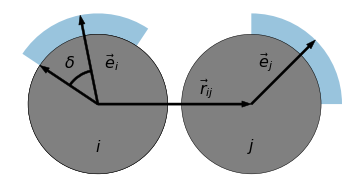

In [10]:
fig, ax = matplotlib.pyplot.subplots()
draw_kern_frenkel_particle(ax, (-1.1, 0), 1, 1.3, 45, (-0.2, 1), draw_arrow=True)
draw_kern_frenkel_particle(ax, (1.1, 0), 1, 1.3, 45, (1, 1), draw_arrow=True)
arrow = matplotlib.patches.FancyArrow(
    -1.1,
    0,
    1.1 - (-1.1),
    0,
    color='k',
    zorder=3,
    width=0.03,
    length_includes_head=True,
)
ax.add_patch(arrow)
theta = numpy.arctan2(1, -0.2) + numpy.deg2rad(45)
arrow = matplotlib.patches.FancyArrow(
    -1.1,
    0,
    numpy.cos(theta),
    numpy.sin(theta),
    color='k',
    zorder=3,
    width=0.03,
    length_includes_head=True,
)
ax.add_patch(arrow)
annulus = matplotlib.patches.Annulus((-1.1, 0), 0.5, 0.03, zorder=2, color='k')
ax.add_patch(annulus)
circle = matplotlib.patches.Wedge(
    (-1.1, 0),
    1,
    numpy.rad2deg(theta),
    numpy.rad2deg(theta + 2 * numpy.pi - numpy.pi / 4),
    zorder=2,
    fc='gray',
    ec='k',
)
ax.add_patch(circle)

# labels
ax.text(0.35, 0.15, r'$\vec{r}_{ij}$', size=16)
ax.text(-1.1, -0.6, r'$i$', size=16, ha='center', va='center')
ax.text(1.1, -0.6, r'$j$', size=16, ha='center', va='center')
ax.text(-0.9, 0.6, r'$\vec{e}_i$', size=16, ha='center', va='center')
ax.text(1.3, 0.6, r'$\vec{e}_j$', size=16, ha='center', va='center')
text = ax.text(-1.5, 0.6, r'$\delta$', size=16, ha='center', va='center')
ylim = ax.set_ylim(-1.1, 1.4)
fig.savefig('kern-frenkel-schematic.svg')